In [1]:
import os
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install nlu > /dev/null 

# Sarcasm Classification with NLU
![](https://camo.githubusercontent.com/0a466b438cfd4f2bc5248f5029cde1fb66dbdefc/68747470733a2f2f6d656d657362616d732e636f6d2f77702d636f6e74656e742f75706c6f6164732f323031372f31312f7368656c646f6e2d7361726361736d2d6d656d652e6a7067)             
Knowing the difference between when somebody is serious or sarcastic can yield inisghts about users of social media plattforms like  Twitter, Reddit, Facebook, etc..     


NLU provides a classifier pretrained on [sarcasm dataset](https://arxiv.org/abs/1704.05579) consisting of 1.3 million sarcastic comments from the internet forum Reddit. 

The Sarcasm classifier model uses universal sentence embeddings and is trained with the classifierdl algorithm provided by Spark NLP.            
https://www.kaggle.com/danofer/sarcasm




In [ ]:
# Download the dataset 
! wget -N https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv -P /tmp

--2020-09-14 01:15:55--  https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.12.182
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.12.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255268960 (243M) [text/csv]
Saving to: ‘/tmp/train-balanced-sarcasm.csv’

train-balanced-sarc 100%[===================>] 243.44M  16.4MB/s    in 16s     

2020-09-14 01:16:12 (15.1 MB/s) - ‘/tmp/train-balanced-sarcasm.csv’ saved [255268960/255268960]



In [ ]:
import nlu
sarcasm_pipe  = nlu.load('en.classify.sarcasm')
sarcasm_pipe.predict('gotta love the teachers who give exams on the day after halloween')

classifierdl_use_sarcasm download started this may take some time.
Approximate size to download 21.5 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


,category_confidence,sentence_embeddings,category,sentence
origin_index,,,,
0,0.999979,"[-0.05071105435490608, 0.038035523146390915, 0...",sarcasm,gotta love the teachers who give exams on the ...


In [ ]:
import pandas as pd
df = pd.read_csv('/tmp/train-balanced-sarcasm.csv')


In [ ]:
sarcasm_pipe  = nlu.load('en.classify.sarcasm')
df['text'] = df['comment']
sarcasm_predictions = sarcasm_pipe.predict(df['text'].iloc[0:1000])
sarcasm_predictions

classifierdl_use_sarcasm download started this may take some time.
Approximate size to download 21.5 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


,category_confidence,sentence_embeddings,category,sentence
origin_index,,,,
0,1.000000,"[-0.06570463627576828, -0.03522053360939026, -...",normal,NC and NH.
1,0.999997,"[-0.0254225991666317, 0.05448468029499054, -0....",normal,You do know west teams play against west teams...
2,0.999999,"[-0.0035701016895473003, -0.030124755576252937...",normal,"They were underdogs earlier today, but since G..."
3,0.999301,"[0.06464719027280807, -0.023972542956471443, -...",normal,"This meme isn't funny none of the ""new york ni..."
4,0.999977,"[0.028676817193627357, 0.0199710875749588, 0.0...",normal,I could use one of those tools.
...,...,...,...,...
995,1.000000,"[-0.04123315587639809, 0.049579471349716187, -...",normal,Have you bound your pistol on mouse wheel?
996,0.999891,"[0.0263528935611248, -0.06056991219520569, -0....",normal,Imagine showing that to someone a little over ...
997,0.998198,"[0.07649341225624084, 0.05448545515537262, -0....",normal,I wish Schumer and Reid had not endorsed Keith...


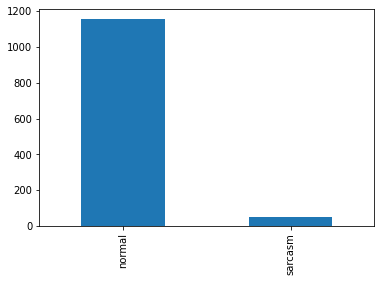

In [ ]:
sarcasm_predictions.category.value_counts().plot.bar(title='Counts of Normal and Sarcasm predicted sentences')